In [15]:
import os
import glob
import re

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image, ImageDraw

from skimage.draw import polygon, polygon2mask
from skimage import io

### Configuration

In [2]:
data_path = 'sample/'
target_size = (512, 512)

In [8]:
imgs = glob.glob(data_path + '**\\*.png', recursive =True)

In [4]:
len(imgs)

606

In [4]:
# glob.glob(data_path + '**\\*Tumor.txt', recursive =True)
# cc = glob.glob(data_path + '**\\*CA_CHA.txt', recursive =True)
# ps = glob.glob(data_path + '**\\*PV_SMV.txt', recursive =True)
# sma = glob.glob(data_path + '**\\*SMA.txt', recursive =True)

In [9]:
structs = {}

structs['tumor'] = glob.glob(data_path + '**\\*Tumor.txt', recursive =True)
structs['cc'] = glob.glob(data_path + '**\\*CA_CHA.txt', recursive =True)
structs['ps'] = glob.glob(data_path + '**\\*PV_SMV.txt', recursive =True)
structs['sma'] = glob.glob(data_path + '**\\*SMA.txt', recursive =True)

In [502]:
glob.glob(data_path + '**/*Tumor.txt', recursive =True)


['sample\\Patient_1\\Set_1\\Slice_49_Region_1_Structure_Tumor.txt',
 'sample\\Patient_1\\Set_1\\Slice_50_Region_1_Structure_Tumor.txt',
 'sample\\Patient_1\\Set_1\\Slice_51_Region_1_Structure_Tumor.txt',
 'sample\\Patient_1\\Set_1\\Slice_52_Region_1_Structure_Tumor.txt',
 'sample\\Patient_1\\Set_1\\Slice_53_Region_1_Structure_Tumor.txt',
 'sample\\Patient_1\\Set_1\\Slice_54_Region_1_Structure_Tumor.txt',
 'sample\\Patient_1\\Set_1\\Slice_55_Region_1_Structure_Tumor.txt',
 'sample\\Patient_1\\Set_1\\Slice_56_Region_1_Structure_Tumor.txt',
 'sample\\Patient_1\\Set_1\\Slice_57_Region_1_Structure_Tumor.txt',
 'sample\\Patient_1\\Set_1\\Slice_58_Region_1_Structure_Tumor.txt',
 'sample\\Patient_1\\Set_1\\Slice_59_Region_1_Structure_Tumor.txt',
 'sample\\Patient_1\\Set_1\\Slice_60_Region_1_Structure_Tumor.txt',
 'sample\\Patient_1\\Set_1\\Slice_61_Region_1_Structure_Tumor.txt',
 'sample\\Patient_1\\Set_1\\Slice_62_Region_1_Structure_Tumor.txt',
 'sample\\Patient_1\\Set_1\\Slice_63_Region_1_St

### PIL draw

In [211]:
vertices = []
with open(tumor[30]) as t:
    for line in t:
        vertices.append(tuple(map(int, re.findall(r'\d+', line))))

In [21]:
target_size = (512, 512)
img = Image.new('L', target_size)
ImageDraw.Draw(img).polygon(vertices, outline=1, fill=1)
mask = np.array(img)

In [22]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

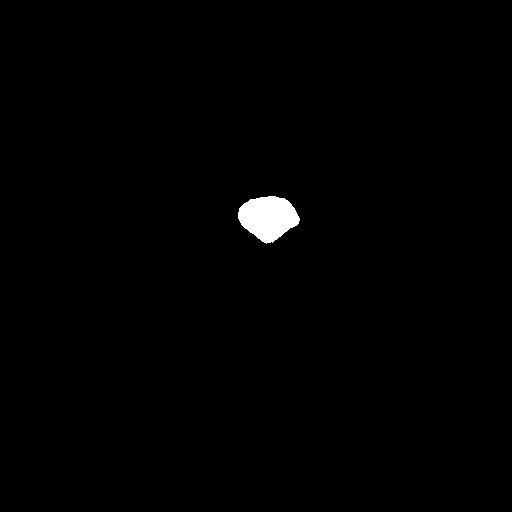

In [23]:
img

In [178]:
Image.open(imgs[98][mask])

IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

In [173]:
img_index = [i for i, x in enumerate(imgs) if x.startswith(tumor[17][:31])]

[98]

In [168]:
tumor[17]

'sample\\Patient_1\\Set_1\\Slice_66_Region_1_Structure_Tumor.txt'

In [171]:
len('sample\\Patient_1\\Set_1\\Slice_66')

31

### Skimage polygon

In [10]:
tumor = structs['tumor']

In [11]:
vertices = []
idx = 30
with open(tumor[idx]) as t:
    for line in t:
        vertices.append(tuple(map(int, re.findall(r'\d+', line))))

In [12]:
img_idx = [i for i, x in enumerate(imgs) if x.startswith(tumor[idx][:31])][0]

In [17]:
img = np.zeros(target_size, 'uint8')
# vs = np.array([(30, 20), (50, 20), (70, 50), (50, 50), (20, 50)])
mask = polygon2mask(target_size, vertices)#.T
img[mask] = 255

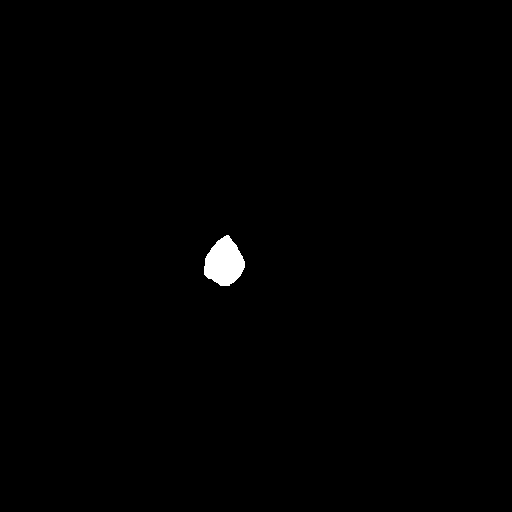

In [18]:
Image.fromarray(img)

In [275]:
og_img = Image.open(imgs[img_idx]).convert('L')

In [276]:
mask_img = np.array(og_img)

In [277]:
mask_img[mask] = 0

In [278]:
mask_img = Image.fromarray(mask_img)

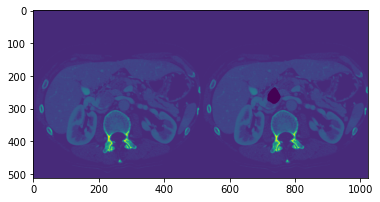

In [279]:
plot_image = np.concatenate((og_img, mask_img), axis=1)
plt.imshow(plot_image)
plt.show()

In [280]:
# vertices = []
# idx = 2
# with open(tumor[idx]) as t:
#     for line in t:
#         vertices.append(tuple(map(int, re.findall(r'\d+', line))))
        
# img_idx = [i for i, x in enumerate(imgs) if x.startswith(tumor[idx][:31])][0]

img = np.zeros(target_size, 'uint8')
# vs = np.array([(30, 20), (50, 20), (70, 50), (50, 50), (20, 50)])
mask = polygon2mask(target_size, vertices).T
img[mask] = 1

og_img = Image.open(imgs[img_idx]).convert('L')

mask_img = np.array(og_img)
mask_img[mask] = 0
mask_img = Image.fromarray(mask_img)

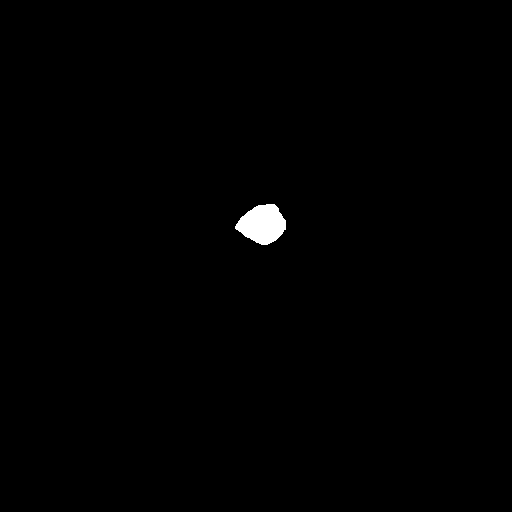

In [281]:
Image.fromarray(mask)

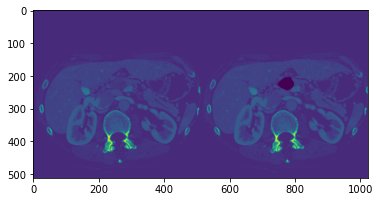

In [282]:
plot_image = np.concatenate((og_img, mask_img), axis=1)
plt.imshow(plot_image)
plt.show()

### mataching img and tumor index

In [283]:
idx = 121

In [285]:
tumor[idx]

'sample\\Patient_1\\Set_1\\Slice_79_Region_1_Structure_Tumor.txt'

In [309]:
tumor[idx][:29]

'sample\\Patient_1\\Set_1\\Slice_'

In [314]:
data_path

'sample/'

In [325]:
path = imgs[121]

In [357]:
path.split('_')

['sample\\Patient', '1\\Set', '1\\Slice', '87', 'CT', 'Image.png']

In [358]:
pattern = re.compile(f'{idx}')

In [350]:
[x for x in imgs if path.split('\\')[3].split('_')[1] in x]

['sample\\Patient_1\\Set_1\\Slice_87_CT_Image.png',
 'sample\\Patient_10\\Set_1\\Slice_187_CT_Image.png',
 'sample\\Patient_10\\Set_1\\Slice_87_CT_Image.png',
 'sample\\Patient_101\\Set_2\\Slice_187_CT_Image.png',
 'sample\\Patient_101\\Set_2\\Slice_87_CT_Image.png']

In [391]:
re.findall(r'Slice_\d+', path)[-1]

'Slice_128'

In [403]:
re.search(r'Slice_\d+', path)

AttributeError: '_sre.SRE_Match' object has no attribute 'match'

In [382]:
path.split('\\')[-1].split('_')

['Slice', '128', 'CT', 'Image.png']

In [396]:
# pattern = re.compile(rf"{path.split('\\')[0]}\\{path.split('\\')[1]}\\{path.split('\\')[2]}\\{path.split('\\')[3].split('_')[0]}\\{path.split('\\')[3].split('_')[1]}")
# pattern = re.compile(rf'{path.split('\\')[0]}\\')
path = imgs[idx]
path_collection = imgs

slice_idx = re.findall(r'Slice_\d+', path)[0]
# pattern = re.compile(rf'Slice_{slice_idx}')
[x for x in path_collection if x.startswith(os.path.join(*path.split('\\')[:3])) 
 and slice_idx in x]

['sample\\Patient_1\\Set_1\\Slice_128_CT_Image.png']

In [378]:
os.path.join(*imgs[idx].split('\\')[:3])
# imgs[idx].split('\\')[:3]

'sample\\Patient_1\\Set_1'

In [ ]:
pattern = re.compile(r'\w+')

In [ ]:
results = re.findall(pattern, )

In [284]:
[i for i, x in enumerate if r'\w+' in imgs]

'sample\\Patient_1\\Set_1\\Slice_79_Region_1_Structure_Tumor.txt'

In [323]:
img_idx = [i for i, x in enumerate(imgs) if x.startswith(tumor[idx][:31])][0]

In [324]:
img_idx

112

e


In [ ]:
path = imgs[idx]

# structs = {}

# structs['tumor'] = glob.glob(data_path + '**\\*Tumor.txt', recursive =True)
# structs['cc'] = glob.glob(data_path + '**\\*CA_CHA.txt', recursive =True)
# structs['ps'] = glob.glob(data_path + '**\\*PV_SMV.txt', recursive =True)
# structs['sma'] = glob.glob(data_path + '**\\*SMA.txt', recursive =True)

def mask_generator(path, structs, target_size):
    
    #create a empty mask(zeros) number of channels corresponding to the n_classes
    mask = np.zeros((target_size, len(structs))
    path_collection = imgs

    slice_idx = re.findall(r'Slice_\d+', path)[0]
    found = [x for x in path_collection if x.startswith(os.path.join(*path.split('\\')[:3])) 
     and slice_idx in x]

    if found:
        #corresponding 
  
        

In [410]:
for i, s in enumerate(structs):
    print(f'{i} : {s}')

0 : tumor
1 : cc
2 : ps
3 : sma


In [411]:
len(structs)

4

In [416]:
np.zeros((2, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [419]:
meta = glob.glob(data_path + '**\\CT_Image.txt', recursive =True)
center = glob.glob(data_path + '**\\Structure_Tumor_CenterPixel.txt', recursive =True)

In [492]:
c_dict = {}

for c in center:
    
    with open(c) as infile:
        line = infile.readline()
        c_point = line.split()[-1]
        
    path = c
    
    c_min = 999
    c_max = 0
    c_range = (0, 0, 0)
    for s in structs:
        

        found = [x for x in structs[s] if x.startswith(os.path.join(*path.split('\\')[:3]))]
        
        for f in found:
            slice_idx = re.findall(r'Slice_\d+', f)[0]
            ss = int(slice_idx[6:])
            c_min = ss if ss<c_min else c_min
            c_max = ss if ss>c_max else c_max 
    
#         old_range = c_range[1] - c_range[0]
    c_range = (c_min, c_max, c_max - c_min)
    c_dict[c_point] = c_range

In [493]:
print(c_dict)

{'67.3185593975523': (31, 136, 105), '111.223250406474': (96, 180, 84), '181.7753147589': (137, 211, 74)}


In [466]:
'Slice_2'[6:]

'2'

In [477]:
(1, 2)[0]

1